4.0


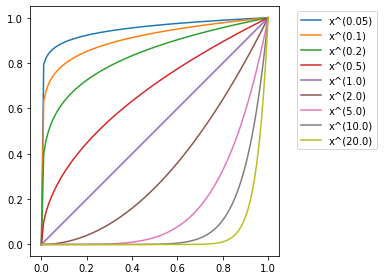

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.linspace(0,1,100)

exponents = np.array([1/20, 1/10, 1/5, 1/2, 1, 2, 5, 10, 20])

# Functions x^n stored in list
#fs = [lambda x: x**n for n in exponents] # Unfortunatelly, closures do not work in Python this way.
fs = [(lambda arg: (lambda x: x**arg))(i) for i in exponents]

labels = [f"x^({item})" for item in exponents]

print(fs[5](2))

# Plot the functions
for i in range(0, len(fs)):
    plt.plot(xs, np.vectorize(fs[i])(xs))
plt.axis('scaled')
# Put legend outsiside the plot area.
plt.legend(labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

In [2]:
# Areas under the function
# Recall that integral(x^n) = 1/(n+1)*x^(n+1)
true_areas = 1/(exponents + 1)
print(true_areas)

[0.95238095 0.90909091 0.83333333 0.66666667 0.5        0.33333333
 0.16666667 0.09090909 0.04761905]


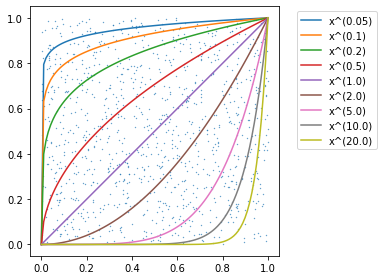

In [3]:
# Chain of random pairs
num_samples = 1000
points = np.random.rand(num_samples,2)

# Plot the functions
for i in range(0, len(fs)):
    plt.plot(xs, np.vectorize(fs[i])(xs))
plt.scatter(points[:,0], points[:,1], s=0.1)
plt.axis('scaled')
# Put legend outsiside the plot area.
plt.legend(labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

Total area of the domain
$$
A_0 = \int_0^1\int_0^1 1 \,dx\,dy
$$

Area bellow function $f$
$$
A_f = \int_{A_f} 1 \,dA = \int_0^1\int_0^{f(x)} 1 \,dy\,dx = \int_0^1 f(x) \, dx
$$

If the points $(x_1, y_1), (x_2, y_2), \cdots , (x_n, y_n)$ are uniformly distributed over the domain $A_0$ random domain then

$$
\frac{A_f}{A_0}\approx\frac{n_f}{n}
$$

where $n_f$ is number of points in domain $A_f$, i.e. bellow the function $f$, and $n$ is number of all points, i.e. points in domain $A_0$.

In [4]:
is_bellow = np.empty([num_samples, len(fs)])

for i in range(0, num_samples):
    for j in range(0, len(fs)):
        is_bellow[i, j] = points[i, 1] < fs[j](points[i, 0])
        
print(is_bellow)
    


[[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]]


In [5]:
num_bellow = np.empty([num_samples, len(fs)])

for i in range(0, num_samples):
    for j in range(0, len(fs)):
        num_bellow[i, j] = sum(is_bellow[:i+1, j])
        
print(num_bellow)

[[  1.   1.   0. ...   0.   0.   0.]
 [  2.   2.   1. ...   0.   0.   0.]
 [  3.   3.   2. ...   0.   0.   0.]
 ...
 [946. 901. 833. ... 158.  86.  45.]
 [947. 902. 834. ... 159.  86.  45.]
 [948. 903. 834. ... 159.  86.  45.]]


In [6]:
areas = np.empty([num_samples, len(fs)])

for i in range(0, num_samples):
    for j in range(0, len(fs)):
        areas[i, j] = num_bellow[i, j] / (i+1)
        
print(areas)

[[1.         1.         0.         ... 0.         0.         0.        ]
 [1.         1.         0.5        ... 0.         0.         0.        ]
 [1.         1.         0.66666667 ... 0.         0.         0.        ]
 ...
 [0.94789579 0.90280561 0.83466934 ... 0.15831663 0.08617234 0.04509018]
 [0.94794795 0.9029029  0.83483483 ... 0.15915916 0.08608609 0.04504505]
 [0.948      0.903      0.834      ... 0.159      0.086      0.045     ]]


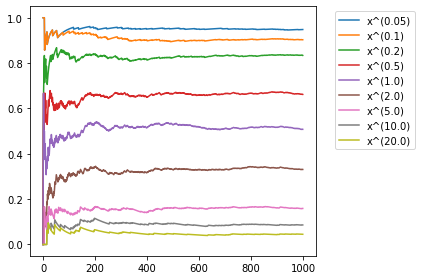

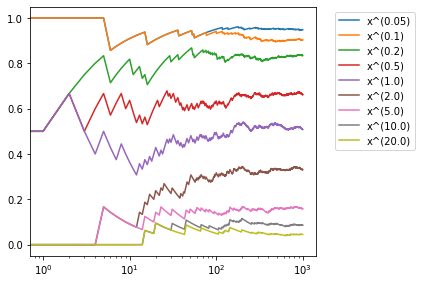

In [7]:
for j in range(len(fs)):
    plt.plot(range(num_samples), areas[:, j])

plt.legend(labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()


# The same in logarithmic scale
for j in range(len(fs)):
    plt.plot(range(num_samples), areas[:, j])

plt.legend(labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.xscale("log")
plt.show()

In [8]:
# Relative error
relative_errors = np.empty([num_samples, len(fs)])

for j in range(0, len(fs)):
    relative_errors[:, j] = (areas[:,j] - true_areas[j]) / true_areas[j]
        
print(relative_errors)

[[ 5.00000000e-02  1.00000000e-01 -1.00000000e+00 ... -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00]
 [ 5.00000000e-02  1.00000000e-01 -4.00000000e-01 ... -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00]
 [ 5.00000000e-02  1.00000000e-01 -2.00000000e-01 ... -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00]
 ...
 [-4.70941884e-03 -6.91382766e-03  1.60320641e-03 ... -5.01002004e-02
  -5.21042084e-02 -5.31062124e-02]
 [-4.65465465e-03 -6.80680681e-03  1.80180180e-03 ... -4.50450450e-02
  -5.30530531e-02 -5.40540541e-02]
 [-4.60000000e-03 -6.70000000e-03  8.00000000e-04 ... -4.60000000e-02
  -5.40000000e-02 -5.50000000e-02]]


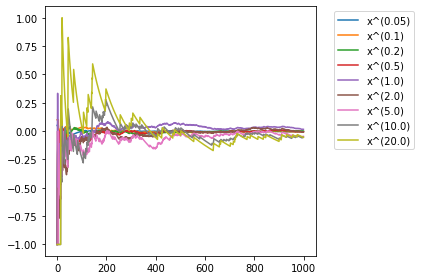

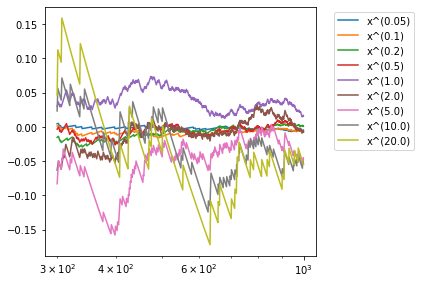

In [10]:
for j in range(len(fs)):
    plt.plot(range(num_samples), relative_errors[:, j])

plt.legend(labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()


# The same in logarithmic scale
for j in range(len(fs)):
    plt.plot(np.array(range(num_samples))[300:], relative_errors[:, j][300:])

plt.legend(labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.xscale("log")
plt.show()